In [1]:
import numpy as np
import matplotlib.pylab as plt
import mesa_reader as mr
import mkipp
%matplotlib inline

# Massive stars - episode II

As we learned in the last lab, stars of $\gtrsim 10\text{--}12\,\mathrm{M}_\odot$ ignite core carbon burning under non-degenerate conditions and will undergo all core burning stages until an iron core forms. No further energy can be extracted from burning iron and the core will collapse, maybe leading to a core-collapse supernova. 

In this lab, we will explore the evolution of an initially $25\,\mathrm{M}_\odot$ model up to the point where the core starts to collapse and reaches infall velocities of $300\,\mathrm{km}\,\mathrm{s}^{-1}$. We also consider moderate convective overshooting and wind mass loss. The full outputs of the MESA run can be downloaded [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/25M_to_core_collapse.tar.gz). You can of course also run the model yourself, but please do so either before or after the lecture, because the computation will take some time.

## Thermonuclear burning beyond helium
So far, we have considered hydrogen and helium burning via the following net reactions:

***H-burning***: Mainly converting hydrogen into helium
\begin{align}
4\,^{1}\mathrm{H} &\rightarrow \,^{4}\mathrm{He} + 2\,\mathrm{e}^{+} + 2\,\nu
\end{align}

***He-burning***: Mainly converting helium into carbon and oxygen
\begin{align}
3\,^{4}\mathrm{He} &\rightarrow \,^{12}\mathrm{C} + \gamma \\
\,^{12}\mathrm{C} + \,^{4}\mathrm{He} &\rightarrow \,^{16}\mathrm{O} + \gamma
\end{align}

Beyond helium burning, the main reactions are as follows. [black board]

***C-burning***: Mainly converting carbon into oxygen, neon and magnesium

***Ne-burning***: Mainly converting neon into oxygen and magnesium

***O-burning***: Mainly converting oxygen into silicon and sulfur

***Si-burning***: Mainly converting the ashes of O-burning into iron group elements

## Core evolution and burning

To make it easier to work with all the output of the MESA run, we have prepared a few definitions, quantities and masks to highlight the various burning stages. These are loaded from the external file `log25M.py` by calling `from log25M import *`.

In [2]:
from log25M import *

We now use the various core burning masks (`mask_h_burn`, `mask_he_burn`, `mask_c_burn` etc.) to highlight the central temperature and density conditions under which the stars burns elements up to iron.

Text(0,0.5,'$\\log\\,T_\\mathrm{c}/\\mathrm{K}$')

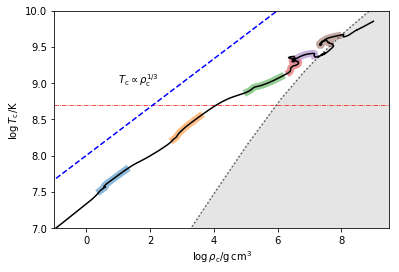

In [13]:
# electron degeneracy
logRho_deg, logT_deg = np.loadtxt('/Users/gaiafabj/Desktop/stellar_cookbook/09.hydrogen-shell-burning/psi4.data', unpack=True)
plt.plot(logRho_deg, logT_deg, 'k:', alpha=0.6)
plt.fill_between(logRho_deg, logT_deg, color='k', alpha=0.1)

# various core burning phases
plt.plot(log_center_Rho[mask_h_burn], log_center_T[mask_h_burn], lw=7, ls='-', alpha=0.5)
plt.plot(log_center_Rho[mask_he_burn], log_center_T[mask_he_burn], lw=7, ls='-', alpha=0.5)
plt.plot(log_center_Rho[mask_c_burn], log_center_T[mask_c_burn], lw=7, ls='-', alpha=0.5)
plt.plot(log_center_Rho[mask_ne_burn], log_center_T[mask_ne_burn], lw=7, ls='-', alpha=0.5)
plt.plot(log_center_Rho[mask_o_burn], log_center_T[mask_o_burn], lw=7, ls='-', alpha=0.5)
plt.plot(log_center_Rho[mask_si_burn], log_center_T[mask_si_burn], lw=7, ls='-', alpha=0.5)

# full track in central rho-T plane
plt.plot(log_center_Rho, log_center_T, 'k-')

# straight line with slope 1/3
plt.plot([-3,3,9], [8-1,8+1,8+3], ls='--', c='b')
plt.text(1, 8+1, r'$T_\mathrm{c} \propto \rho_\mathrm{c}^{1/3}$')

# flattening of evolutionary track from ~5*10^8 K on
plt.hlines(np.log10(5e8), -1.0, 9.5, color='r', linestyle='-.', linewidth=0.7)

plt.xlim(-1.0, 9.5)
plt.ylim(7.0, 10.0)

plt.xlabel(r'$\log\,\rho_\mathrm{c}/\mathrm{g}\,\mathrm{cm}^{3}$')
plt.ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')

From the schematic evolution of stars, we know that the cores of stars in HE and powered by an ideal gas are expected to follow a relation of the form $T_\mathrm{c}\propto \rho_\mathrm{c}^{1/3}$. Deviations from this pure power-law behaviour are seen whenever different nuclear burning stages are ignited and convective cores are formed. Also, from a temperature of about $5\times10^{8}\,\mathrm{K}$ on, i.e. from before core-carbon burning on, the star follows a shallower power-law and the temperature increases less steeply (cf. thin, dot-dashed, red line). We will see below why this is the case.

Before we go into more details, let's study the core burning stages further and collect some key results. For example, the main product of hydrogen burning is helium and the ignition conditions and duration are 

#### Problem 1: 
Repeat these computations for the other burning stages using the pre-defined masks as in the above example. Comment on your main findings and in particular on the duration of the burning stages beyond helium.

In [23]:
# Your solution here
print('H-burning: T/10^9 K = %.3f, rho = %.1f g/cm^3, t = %.1f x 10^6 yr.' % (
      np.power(10, log_center_T[mask_h_burn][0]-9),
      np.power(10, log_center_Rho[mask_h_burn][0]), 
      (star_age[mask_h_burn][-1]-star_age[mask_h_burn][0])/1e6))

print('He-burning: T/10^9 K = %.3f, rho = %.1f g/cm^3, t = %.1f x 10^6 yr.' % (
      np.power(10, log_center_T[mask_he_burn][0]-9),
      np.power(10, log_center_Rho[mask_he_burn][0]), 
      (star_age[mask_he_burn][-1]-star_age[mask_he_burn][0])/1e6))

print('C-burning: T/10^9 K = %.3f, rho = %.1f g/cm^3, t = %.1f yr.' % (
      np.power(10, log_center_T[mask_c_burn][0]-9),
      np.power(10, log_center_Rho[mask_c_burn][0]), 
      (star_age[mask_c_burn][-1]-star_age[mask_c_burn][0])))

print('Ne-burning: T/10^9 K = %.3f, rho = %.1f g/cm^3, t = %.1f weeks.' % (
      np.power(10, log_center_T[mask_ne_burn][0]-9),
      np.power(10, log_center_Rho[mask_ne_burn][0]), 
      (star_age[mask_ne_burn][-1]-star_age[mask_ne_burn][0])*52))

print('O-burning: T/10^9 K = %.3f, rho = %.1f g/cm^3, t = %.1f days.' % (
      np.power(10, log_center_T[mask_o_burn][0]-9),
      np.power(10, log_center_Rho[mask_o_burn][0]), 
      (star_age[mask_o_burn][-1]-star_age[mask_o_burn][0])*365))

print('Si-burning: T/10^9 K = %.3f, rho = %.1f g/cm^3, t = %.1f days.' % (
      np.power(10, log_center_T[mask_si_burn][0]-9),
      np.power(10, log_center_Rho[mask_si_burn][0]), 
      (star_age[mask_si_burn][-1]-star_age[mask_si_burn][0])*365))

H-burning: T/10^9 K = 0.033, rho = 2.7 g/cm^3, t = 6.4 x 10^6 yr.
He-burning: T/10^9 K = 0.167, rho = 548.4 g/cm^3, t = 0.7 x 10^6 yr.
C-burning: T/10^9 K = 0.753, rho = 112652.1 g/cm^3, t = 113.7 yr.
Ne-burning: T/10^9 K = 1.420, rho = 2366241.1 g/cm^3, t = 14.1 weeks.
O-burning: T/10^9 K = 2.098, rho = 3279904.9 g/cm^3, t = 12.4 days.
Si-burning: T/10^9 K = 3.532, rho = 45371231.3 g/cm^3, t = 0.6 days.


#### Student-report part 1:
Take the results from Problem 1 and complete the following table for your report:

| Burning stage | Temperature ($\,10^9\,\mathrm{K}$) | Density (cgs) | Fuel | Main products | Duration |
| ---: | :---: | :---: | :--- | :--- | :---: |
| Hydrogen | $0.033$ | $2.7$ | H | He | $6.4\times 10^{6}\,\mathrm{yr}$ |
| Helium | $0.167$ | $584.4$ | He | C | $0.7\times 10^{6}\,\mathrm{yr}$ |
| Carbon | $0.753$ | $112652.1$ | C | Ne,O,Mg | $113.7\,\mathrm{yr}$ |
| Neon | $1.420$ | $2366241.1$ | Ne | O,Mg | $14.1\, \mathrm{weeks}$ |
| Oxygen | $2.098$ | $3279904.9$ | O | Si,S | $12.4\, \mathrm{days}$ |
| Silicon | $3.532$ | $45371231.3$ | Si | Fe | $0.6\, \mathrm{days}$ |

The duration of the nuclear-burning stages decreases drastically and the whole core carbon, neon, oxygen and silicon burning only lasts for hundred years, tenish weeks, tenish days and half a day, respectively. What is going on? The nuclear burning timesale is given by
\begin{align}
\tau_\mathrm{nuc} = \frac{E_\mathrm{nuc}}{L} = \frac{\phi f_\mathrm{nuc} M c^2}{L},
\end{align}
where $f_\mathrm{nuc}$ is the fraction of the total mass available to nuclear burning, $\phi$ denotes the burning efficiency (e.g. it is roughly $\phi\approx 0.007$ for hydrogen burning and about a factor of 10 smaller for helium burning; you can compute this by considering how much energy is releases from burning 1g of fuel to the corresponding ashes and you will only need to know the total mass of atoms involved). 

It is not the nuclear-burning efficiency that changes drastically and also the available nuclear fuel for the different burning stages is not so different. What speeds up the evolution are **neutrino losses** that become relevant above a temperature of about $5\times 10^8\,\mathrm{K}$, i.e. before carbon burning is ignited (in the considered model, carbon was ignited at about $7.5\times 10^8\,\mathrm{K}$). Above such core temperatures, the star will be extremely luminous in neutrinos and they carry away much more energy than photons from the stellar surface. 

To motivate that the stellar matter is essentially transparent to neutrinos, we consider the neutrino scattering cross section, which is roughly given by
\begin{align}
\sigma_\nu = A^2 \left( \frac{E_\nu}{m_\mathrm{e} c^2} \right)^2\,10^{-45}\,\mathrm{cm}^{-2},
\end{align}
where $E_\nu$ is the neutrino energy and $A$ the nucleon number of atoms with which neutrinos scatter. Assuming that $E_\nu\approx m_\mathrm{e} c^2$, i.e. MeV neutrinos (which is about right for pair annihilation neutrinos; see below), we have a mean free path for neutrinos of
\begin{align}
l_\nu = \frac{1}{n \sigma_\nu} \approx 1.4\times 10^{15}\,\mathrm{cm}\, \left( \frac{12}{A} \right) \, \left( \frac{10^5\,\mathrm{g}\,\mathrm{cm}^{-3}}{\rho} \right).
\end{align}
Less energetic neutrinos, e.g. neutrinos with roughly the thermal energy of electrons ($E_\nu \approx k_\mathrm{B} T \approx 40\text{--}400\,\mathrm{keV}$ for $T=5\times10^{8}\text{--}10^9\,\mathrm{K}$), have an even smaller cross section and hence larger mean free path. So for densities of $10^5\text{--}10^7\,\mathrm{g}\,\mathrm{cm}^{-3}$, the neutrino mean free path is of order $10^{13}\text{--}10^{15}\,\mathrm{cm}$, i.e. $10^2\text{--}10^4\,\mathrm{R}_\odot$. This means that neutrinos essentially leave the star without interaction.

For carbon burning and beyond, the neutrino luminosity gets extremely large ($L_\nu \gg L$), such that the nuclear timescale is
\begin{align}
\tau_\mathrm{nuc} = \frac{E_\mathrm{nuc}}{L_\nu}.
\end{align}
As can be seen in the below figure, the neutrino luminosity reaches values of $>10^{12}\,\mathrm{L}_\odot$, which then explains the extremely short nuclear burning timescales. 

Also, neutrinos lead to an efficient cooling of the stellar interior which is why the evolutionary track in the $T_\mathrm{c}$-$\rho_\mathrm{c}$ plane is shallower than the expected $T_\mathrm{c}\propto \rho_\mathrm{c}^{1/3}$ trend. 

(2, 15)

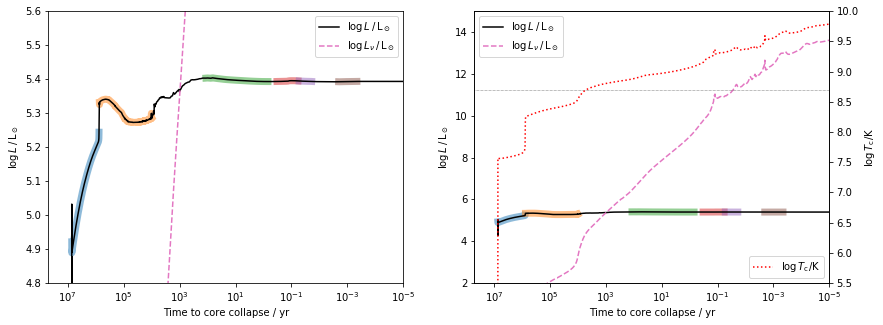

In [24]:
time_to_cc = star_age[-1]-star_age

log_L = concatenate('log_L')
log_L_nonnuc_neu = concatenate('log_L_nonnuc_neu')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

def plot_luminosities(ax, Tc=False):
    ax.plot(time_to_cc[mask_h_burn], log_L[mask_h_burn], lw=7, ls='-', alpha=0.5)
    ax.plot(time_to_cc[mask_he_burn], log_L[mask_he_burn], lw=7, ls='-', alpha=0.5)
    ax.plot(time_to_cc[mask_c_burn], log_L[mask_c_burn], lw=7, ls='-', alpha=0.5)
    ax.plot(time_to_cc[mask_ne_burn], log_L[mask_ne_burn], lw=7, ls='-', alpha=0.5)
    ax.plot(time_to_cc[mask_o_burn], log_L[mask_o_burn], lw=7, ls='-', alpha=0.5)
    ax.plot(time_to_cc[mask_si_burn], log_L[mask_si_burn], lw=7, ls='-', alpha=0.5)

    ax.plot(time_to_cc, log_L, 'k-', label=r'$\log\,L\,/\,\mathrm{L}_\odot$')
    ax.plot(time_to_cc, log_L_nonnuc_neu, ls='--', label=r'$\log\,L_\nu\,/\,\mathrm{L}_\odot$')

    ax.set_xlabel('Time to core collapse / yr')
    ax.set_ylabel(r'$\log\,L\,/\,\mathrm{L}_\odot$')
    
    if Tc:
        ax2 = ax.twinx()
        ax2.plot(time_to_cc, log_center_T, 'r:', label=r'$\log\,T_\mathrm{c}/\mathrm{K}$')
        ax2.set_ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')
        #ax2.vlines(1e3, 5.5, 10, color='k', linestyle=':', linewidth=0.5)
        ax2.hlines(np.log10(5e8), 5e7, 1e-5, color='k', linestyle=':', linewidth=0.5)
        ax2.set_ylim(5.5, 10)
        ax2.legend(loc='lower right')
    
    ax.set_xlim(5e7, 1e-5)
    ax.set_xscale('log')
    ax.legend()

plot_luminosities(ax1)
ax1.set_ylim(4.8, 5.6)

plot_luminosities(ax2, Tc=True)
ax2.set_ylim(2,15)

### Neutrino sources

Apart from nuclear reactions, there are weak reactions that can produce neutrinos spontaneously. The most important are:

* Pair-annihilation neutrinos: for $T>10^9\,\mathrm{K}$, photons can produce electron-positron pairs ($\gamma + \gamma \leftrightarrow \mathrm{e}^+ + \mathrm{e}^-$) that then decay to form neutrinos in every $10^{19}$th case: $\mathrm{e}^+ + \mathrm{e}^- \rightarrow \nu + \bar{\nu}$.

* Photo neutrinos: similarly to Compton scattering, photon scattering off an electron can produce neutrinos in rare cases: $\gamma + \mathrm{e}^- \rightarrow \mathrm{e}^- + \nu + \bar{\nu}$.

* Plasma neutrinos: in a plasma, there can be quantized, excited plasma states (so-called plasmons) that decay into $\nu + \bar{\nu}$; this only happens in electron-degenerate gases at high densities ($\rho > 10^\,\mathrm{g}\,\mathrm{cm}^{-2}$).

* Bremsstrahlung neutrinos: the inelastic scattering of an electron in the Coulomb field of an atomic nucleus can in rare cases produce a $\nu + \bar{\nu}$ pair instead of the usual photon. This rather occurs at low $T$ and high $\rho$.

In principle, there are also synchrotron neutrinos from electrons scattering in a strong magnetic field. More details can, e.g., be found in Hansen, Kawaler, Trimble, chapter 6.8, and Kippenhahn, Weigert, Weiss, chapter 18.7.

## From core to shell burning and the onion-layer structure of pre-SN stars

We have now understood the basic nuclear burning happening in massive stars in their late evolutionary phases and that these burning stages are extremely accelerated by neutrino emission. Next, we will consider not only the core burning stages but also look into how core-burning sources switch off and move to surrounding shells just like core hydrogen burning moves outwards in mass and switches from core to shell burning. During the late burning stages, i.e. after core helium burning, the interior structure of massive stars gets quite complicated as can be seen by the following Kippenhahn diagrams - the right panel simply being a zoom into the innermost $10\,\mathrm{M}_\odot$ and late burning times.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9']
/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/ ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9']
/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9 ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_ex

Text(607.232,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

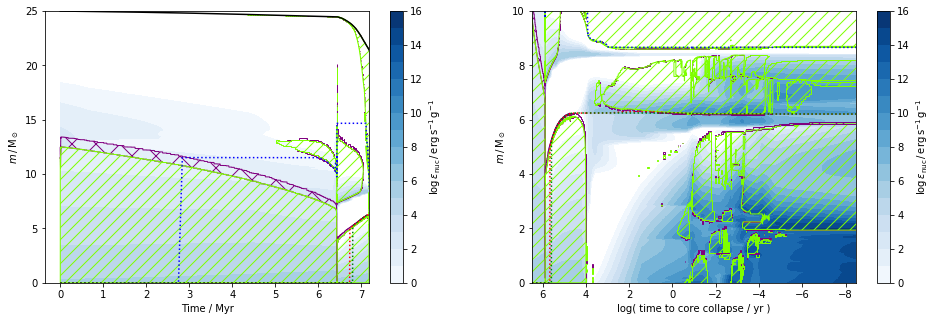

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

# moderate overshooting model
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9'],
                                            xaxis = 'star_age',
                                            show_semi = False,
                                            show_therm = False,
                                            decorate_plot = False), axis=ax1)

cbar1 = plt.colorbar(kipp_plot.contour_plot, pad=0.05, ax=ax1)
cbar1.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

ax1.set_ylim(0,25)

ax1.set_xlabel('Time / Myr')
ax1.set_ylabel(r'$m\,/\,\mathrm{M}_\odot$')


# large overshooting model
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9'],
                                            xaxis = 'star_age',
                                            time_units = 'yr',
                                            function_on_xaxis = lambda x: np.log10(star_age[-1]+3.0e-9 - x),
                                            show_semi = False,
                                            show_therm = False,
                                            decorate_plot = False), axis=ax2)

cbar2 = plt.colorbar(kipp_plot.contour_plot, pad=0.05, ax=ax2)
cbar2.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

ax2.set_xlim(6.5, -8.5)
ax2.set_ylim(0,10)

ax2.set_xlabel('log( time to core collapse / yr )')
ax2.set_ylabel(r'$m\,/\,\mathrm{M}_\odot$')

#### Problem 2:
1. In the left Kippenhahn diagram, identify the convective regions driven by core- and shell-hydrogen burning. Also identify the convective region due to helium burning and the convective envelope from the low opacities because of the cool temperature of stars when they approach their Hayashi track. *Hint:* the convective shell visible at the end of the MS is sometimes called 'intermediate-convection zone'.
2. Identify the same regions as in (1) but in the right Kippenhahn diagram. The uppermost convective region after core-helium burning is the convective envelope.

We can see that first hydrogen is burnt in the core before the hydrogen-burning source moves into a shell surrounding the hydrogen-exhausted core. The same happens for helium burning and all later burning stages. We have indicated the helium-burning shell in the below Kippenhahn diagram with the command `ax.text(1, 7, 'He', horizontalalignment='center', verticalalignment='center', fontsize=17)`. To better understand the burning regions, you will now add labels to the other core and shell burning regions.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9']
/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/ ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9']
/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9 ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_ex

Text(102.25,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

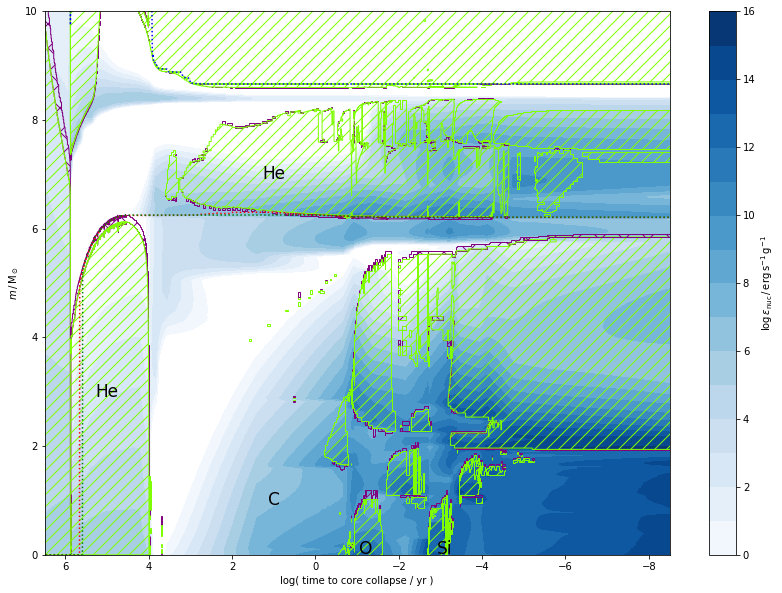

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_core_he_exhaustion', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_si_burn/', '/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_to_lgT_9.9'],
                                            xaxis = 'star_age',
                                            time_units = 'yr',
                                            function_on_xaxis = lambda x: np.log10(star_age[-1]+3.0e-9 - x),
                                            show_semi = False,
                                            show_therm = False,
                                            decorate_plot = False), axis=ax)

cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

# add labels here
ax.text(5, 3, 'He', horizontalalignment='center', verticalalignment='center', fontsize=17)
ax.text(1, 7, 'He', horizontalalignment='center', verticalalignment='center', fontsize=17)
ax.text(1, 1, 'C', horizontalalignment='center', verticalalignment='center', fontsize=17)
ax.text(-1.2,0.1, 'O', horizontalalignment='center', verticalalignment='center', fontsize=17)
ax.text(-3.1,0.1, 'Si', horizontalalignment='center', verticalalignment='center', fontsize=17)

#
# ...
#

ax.set_xlim(6.5, -8.5)
ax.set_ylim(0,10)

ax.set_xlabel('log( time to core collapse / yr )')
ax.set_ylabel(r'$m\,/\,\mathrm{M}_\odot$')

#### Problem 3:
1. From the above analysis, we know that core-carbon burning is active at around 10 yr to core collapse. From the Kippenhahn diagram, we see that it proceeds under *radiative* conditions and that it does not drive a convective core. This is a very important feature as we will discuss below. Add annotations to the Kippenhahn diagram to indicate core- and shell-carbon burning just as we did for helium burning.
2. Neon burning precedes oxygen burning but the convective regions due to oxygen burning are visible more easily. Roughly indicate core-neon burning.
3. Now also indicate core- and shell-oxygen burning.
4. Finally, indicate core- and shell-silicon burning.

These sequences of core and shell burning of the different nuclear fuels leave behind a star with an onion-like structure: the iron core is surrounded by a silicon/sulfur layer which itself is surrounded by a oxygen/neon/magnesium layer which is surrounded by a carbon/oxygen layer which is surrounded by a helium layer and finally there is the hydrogen envelope where no nuclear burning took place. We can take the very last profile of the model sequence to illustrate this structure:

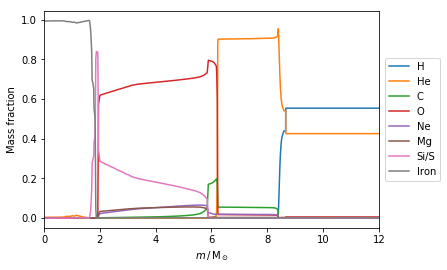

In [4]:
log_final = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_to_core_collapse/LOGS_finish')

SiS = log_final.profile_data().si28 + log_final.profile_data().s32
iron =  log_final.profile_data().fe54 + \
        log_final.profile_data().fe56 + \
        log_final.profile_data().co56 + \
        log_final.profile_data().ni56 + \
        log_final.profile_data().cr60

plt.plot(log_final.profile_data().mass, log_final.profile_data().h1, label='H')
plt.plot(log_final.profile_data().mass, log_final.profile_data().he4, label='He')
plt.plot(log_final.profile_data().mass, log_final.profile_data().c12, label='C')
plt.plot(log_final.profile_data().mass, log_final.profile_data().o16, label='O')
plt.plot(log_final.profile_data().mass, log_final.profile_data().ne20, label='Ne')
plt.plot(log_final.profile_data().mass, log_final.profile_data().mg24, label='Mg')
plt.plot(log_final.profile_data().mass, SiS, label='Si/S')
plt.plot(log_final.profile_data().mass, iron, label='Iron')

plt.xlim(0, 12)

plt.xlabel(r'$m\,/\,\mathrm{M}_\odot$')
plt.ylabel(r'Mass fraction')

plt.legend(loc='center', bbox_to_anchor=(1.1,0.5))

So indeed, we can see the onion-like structure of the star: from center to surface the chemical structure is iron, Si/S, O/Ne/Mg, C/O, He and H/He.

<img src="onion-structure.png" alt="Onion-layer structure of massive pre-SN star" width="500"/>

## Final fate, compactness and explodability

We will discuss the final fate and supernova of massive stars in a separate lecture. Without going into too many details, it is intuitively understandable that the more compact a stellar core is, the harder it is to launch a successful explosion. In the literature, people often consider the so-called compactness parameter $\xi_M$,
\begin{align}
\xi_M = \frac{M/\mathrm{M}_\odot}{R_M/1000\,\mathrm{km}},
\end{align}
where $R_M$ is the radius at (baryonic) mass coordinate $M$. Often, a mass coordinate of $M=2.5\,\mathrm{M}_\odot$ is chosen because this ensures that the whole iron core is considered by this definition.

#### Problem 4:
Compute the compactness parameter of the model given the provided linear interpolation of mass and radius at the time when the core starts to collapse (i.e. the last profile). The radius returned by the interpolated function is in solar radii and the mass is in solar masses.

In [6]:
from scipy.interpolate import interp1d

f = interp1d(log_final.profile_data().mass, log_final.profile_data().radius)
R_25 = f(2.5)*6.985e5


xi = 2.5/(R_25/1000) # your solution here


print('R(2.5 Msun) = %.0f km, xi = %.3f' % (R_25, xi))

R(2.5 Msun) = 5671 km, xi = 0.441


In the file `pre-sn-params.txt`, you find the initial masses, final compactness parameters and a flag whether core-carbon burning was radiative or convective from some (yet) unpublished stellar models (Schneider in prep.). In particular, you can observe a jump in the compactness parameter that is due to whether core-carbon burning was convective or radiative. Convective carbon burning results in less compact cores and radiative carbon burning in significantly more compact cores. 

A critical compactness of $\xi_{2.5}^{\mathrm{crit}}=0.45$ has been suggested to distinguish between stars that successfully explode in a supernoave and that may fail to do so (e.g. O'Connor and Ott 2011). However, predicting whether a pre-SN star will explode or not is a hot topic in present day research and this very simple criterion considered here is most likely not sufficient. Still, it gives a first idea of how 'easy' or 'difficult' it may be for the star to explode in a supernova.

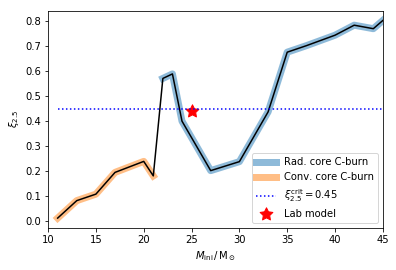

In [7]:
Mini, xi, cburn = np.loadtxt('pre-sn-params.txt', unpack=True)
mask_rad = cburn == 0
mask_conv = cburn == 1

plt.plot(Mini[mask_rad], xi[mask_rad], ls='-', lw=7, alpha=0.5, label='Rad. core C-burn')
plt.plot(Mini[mask_conv], xi[mask_conv], ls='-', lw=7, alpha=0.5, label='Conv. core C-burn')
plt.plot(Mini, xi, 'k-')

plt.plot([Mini[0], Mini[-1]], [0.45, 0.45], 'b:', label=r'$\xi_{2.5}^{\mathrm{crit}}=0.45$')

plt.scatter(25, 0.441, s=180, c='r', marker=(5, 1), label='Lab model')

plt.xlabel(r'$M_\mathrm{ini}\,/\,\mathrm{M}_\odot$')
plt.ylabel(r'$\xi_{2.5}$')

plt.xlim(10,45)

plt.legend(loc='lower right')

#### Problem 5: 
The initial $25\,\mathrm{M}_\odot$ model considered here, has a compactness that is somewhat larger than the one suggested in the above figure where a $25\,\mathrm{M}_\odot$ star would have a compactness of $\xi_{2.5}\approx 0.35$. Can you imagine a reason for the difference? *Hint:* Think about the last lab...

Difference is due to overshooting